In [1]:
from graph_plot import *
from degree_normalized_eigenvectors import *
from graph_class import Graph

[ 1 -2  3 -4]
Computing eigenvector  0 ...
Computing eigenvector  1 ...
Test results: 
SVD decomposition of matrix A = 
[[ 0.10446789  0.21374584 -0.35147879 -0.32933194 -0.04066323]
 [ 0.21374584 -0.30406753  0.56138671  0.5816871  -0.55654225]
 [-0.35147879  0.56138671 -0.19588802 -0.50795591  0.83022445]
 [-0.32933194  0.5816871  -0.50795591 -0.3689963   0.57068535]
 [-0.04066323 -0.55654225  0.83022445  0.57068535  0.60199212]]
:
u =  [[ 0.21333803  0.23710356 -0.33860649  0.36285007 -0.80743685]
 [-0.50668011  0.11260381  0.76112959  0.21834827 -0.32187175]
 [ 0.52441508 -0.442169    0.30259225  0.63972595  0.16930457]
 [ 0.52250248 -0.16687525  0.40074908 -0.63659803 -0.36508483]
 [-0.38696528 -0.84127374 -0.23208941 -0.07846986 -0.28721655]]
s =  [2.         1.23750815 0.3        0.2        0.1       ]
vt =  [[-0.21333803  0.50668011 -0.52441508 -0.52250248  0.38696528]
 [ 0.23710356  0.11260381 -0.442169   -0.16687525 -0.84127374]
 [-0.33860649  0.76112959  0.30259225  0.400749

In [2]:
# # Set graph using adj. matrix:
# A = np.loadtxt('../data/graph.txt')
# G = Graph()
# G.set_adj_matrix(A)

# Set graph using adj. list from file
f = open('../data/3elt.graph')
G = Graph(f)

# Print graph object
print(G)

 2 5 4

[graph object] nodes = 4720; edges = 13722


Finding  1 -th eigenvector...
1 - product =  1.760596302080586e-08
Finding  2 -th eigenvector...
1 - product =  4.608004355866058e-08


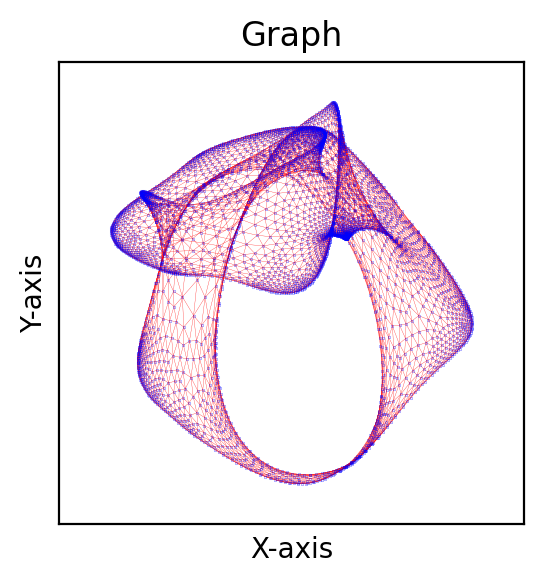

NameError: name 'x_coord2' is not defined

In [3]:
#Degree normalized eigenvectors
U, times = degree_normalized_eigenvectors(np.diag(G.degs), G.adj_matrix, 2, tol = 1e-6, max_iter = 2000, matmul = True)

#2D graph plot coordinates
x_coord = U[:, 0]
y_coord = U[:, 1]

graph_plot(G.adj_matrix, x_coord, y_coord, node_size = 0.01, figsize = (3,3), dpi = 200, add_labels= False)
graph_plot(G.adj_matrix, x_coord2, y_coord2, node_size = 0.01, figsize = (3,3), dpi = 200, add_labels= False)


In [ ]:
# Trying with standard power method:
B = 0.5 * (np.eye(G.n_nodes) + np.diag(1. / G.degs)@G.adj_matrix)
V = power_method(B, 2)
x_coord2 = V[:, 0]
y_coord2 = V[:, 1]

In [ ]:
# Trying with High Dimensional Embedding approach
p = 3
m = 50
V, B, X = hde_spectral_drawing(G, p, m, tol = 1e-10, max_iters = 10000, test = False, use_gershgorin = False)
x_coord, y_coord = V[:,0], V[:,1]

graph_plot(G.adj_matrix, x_coord, y_coord, node_size = 0.001, figsize = (3,3), add_labels = False)

In [ ]:
B_u, B_s, B_vt = np.linalg.svd(B)
x_coord2, y_coord2 = X@B_u[:,0], X@B_u[:,1]
print(x_coord2, y_coord2)
print(len(x_coord2), len(y_coord2))

In [ ]:
plt.scatter(x_coord2, y_coord2, s = 0.001)

In [ ]:
B = 0.5 * (np.eye(G.n_nodes) + np.diag(1. / G.degs)@G.adj_matrix)

In [ ]:
u, s, vt = np.linalg.svd(B)

In [ ]:
graph_plot(G.adj_matrix, u[:,0], u[:,1], node_size = 0.001, figsize = (3,3), add_labels = False)